In [21]:
import numpy as np
import matplotlib.pyplot as plt
import simim.siminterface as sim

tng100 = sim.SimHandler('TNG100-1')

rng = np.random.default_rng(1511)

pixel_size = tng100.box_edge_no_h / 450

z_for_modeling = 0.95
nu_co = sc.nu_co43
lco = 'L43'

z_for_modeling = 1.43
nu_co = sc.nu_co54
lco = 'L54'

tng100_snap = tng100.get_snap_from_z(z_for_modeling)


In [22]:
from simim.galprops import prop_co_sled
from simim import constants as sc

tng100_snap.make_property(prop_co_sled, other_kws={'rng': rng, 'fircor':0.6}, overwrite=True, kw_remap={'sfr': 'sfr_behroozi'})
allvals = tng100_snap.return_property(lco)

# convert from Lsun to K km/s pc^2
allvals *= 3.25e10 * (nu_co / 1e9) ** -3

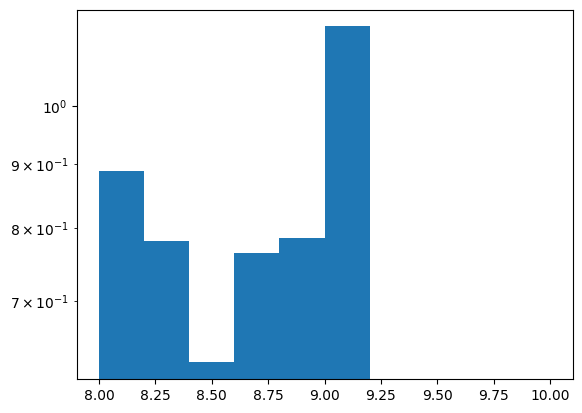

In [24]:
plt.hist(np.log10(allvals), bins=10, range=(8,10), density=True)
plt.yscale('log')

In [10]:
nu_co

461040768200.0